In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV as rscv
from sklearn.model_selection import GridSearchCV as gscv
data = pd.read_csv('train.csv')

In [ ]:
data.head(10)

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male
5,1492,5872,1491.0,994,11,1997,4,2889,327.0,45.909091,36.500000,55.0,41.0,Male
6,1500,5322,1191.0,287,6,1980,3,2631,269.0,47.000000,24.500000,61.0,25.0,Male
7,349,6098,2692.0,2472,9,1988,2,3057,53.0,43.000000,31.000000,48.0,31.0,Male
8,857,8851,4042.0,3476,13,2001,2,3952,89.0,47.416667,28.500000,33.0,27.0,Male
9,2619,9626,1604.0,869,9,1973,6,5403,565.0,26.500000,22.000000,20.0,26.0,Male


In [ ]:
rat = 0.9
np.random.seed(3)
ogr = np.random.choice(data.shape[0], size = int(rat * data.shape[0]), replace=False)
train = data.iloc[ogr]
deneme = data.iloc[~data.index.isin(ogr)]
x_train = train.drop(columns=['Lead'])
y_train = train['Lead']
x_test = deneme.drop(columns=['Lead'])
y_test = deneme['Lead']

In [ ]:
hmodel = knn(n_neighbors = 5)
hmodel.fit(x_train, y_train)
h_prediction = hmodel.predict(x_test)
print(f'Accuracy of the test data set is: {hmodel.score(x_test, y_test)}')
pd.crosstab(h_prediction, y_test)

Accuracy of the test data set is: 0.8461538461538461


Lead,Female,Male
row_0,,
Female,7,2
Male,14,81


In [ ]:
misclass = []
for k in range(10):
  model = knn(n_neighbors = k + 1)
  model.fit(x_train, y_train)
  prediction = model.predict(x_test)
  misclass.append(np.mean(prediction != y_test))

Visualization

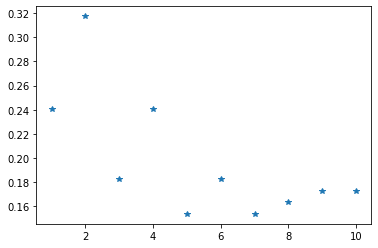

[0.2403846153846154, 0.3173076923076923, 0.18269230769230768, 0.2403846153846154, 0.15384615384615385, 0.18269230769230768, 0.15384615384615385, 0.16346153846153846, 0.17307692307692307, 0.17307692307692307]


In [ ]:
k = np.linspace(1, 10, 10)
plt.plot(k, misclass, '*')
plt.show()
print(misclass)

Parameters


In [ ]:
hmodel.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Optimization

In [ ]:
hmodel.get_params().keys()
n_neighbors = list(range(1, 11))
p = list(range(1, 11))
leaf_size = list(range(10, 101, 10))
param_grid = {'n_neighbors': n_neighbors, 'p': p, 'leaf_size': leaf_size}
CV = rscv(estimator = hmodel, param_distributions = param_grid, n_iter =  10, cv = 3, verbose = 2, random_state = 1, n_jobs = -1)
CV.fit(x_train, y_train)
print(f'The best values of chosen parameters are {CV.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best values of chosen parameters are {'p': 6, 'n_neighbors': 5, 'leaf_size': 70}


In [ ]:
hmodel_opt = knn(n_neighbors = 6, p = 5, leaf_size = 70)
ap = hmodel_opt.fit(x_train, y_train)
abdi = hmodel_opt.predict(x_test)
print(f'Accuracy of the test data set is: {ap.score(x_test, y_test)}')
pd.crosstab(abdi, y_test)

Accuracy of the test data set is: 0.8269230769230769


Lead,Female,Male
row_0,,
Female,8,5
Male,13,78
